![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

## [ ] Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [120]:
import seaborn as sns #!
import pandas as pd

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 10)

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
...,...,...
WI,4.554,106.62
WY,5.568,122.04


## `KMeans()` Model in Python

### Fit the Model

In [121]:
from sklearn.cluster import KMeans

In [122]:
model = KMeans(n_clusters=3)

In [123]:
model.fit(df_crashes)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [124]:
model.predict(X=df_crashes)

array([2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 0])

### Create a New DataFrame for the Predictions

In [125]:
df_pred = df_crashes.copy()
df_pred['pred'] = model.predict(X=df_crashes)

In [126]:
df_pred

,alcohol,ins_losses,pred
abbrev,,,
AL,5.640,145.08,2
AK,4.525,133.93,2
...,...,...,...
WI,4.554,106.62,0
WY,5.568,122.04,0


### Visualize the Model

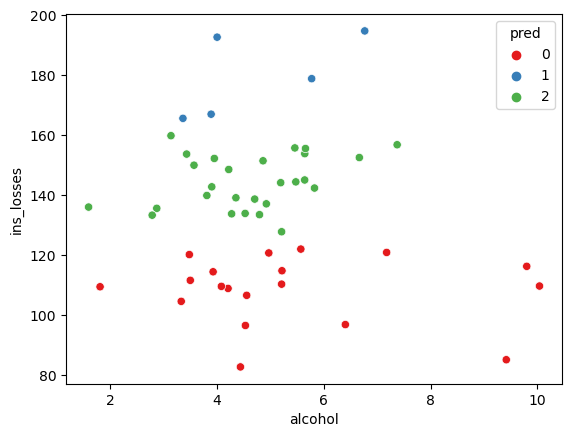

In [127]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1');

### [ ] Model Interpretation

In [128]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### The Need for Scaling the Data

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

In [129]:
import matplotlib.pyplot as plt

(0.0, 200.0)

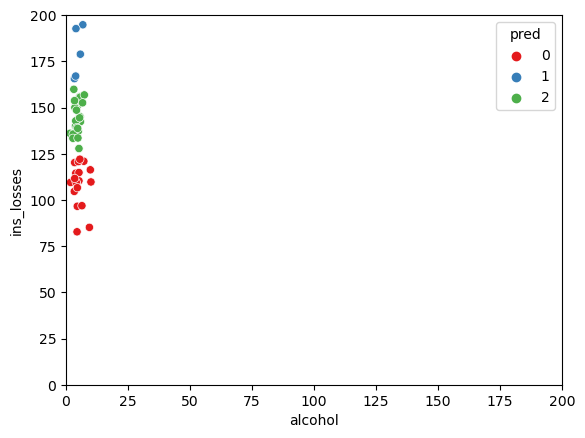

In [130]:
sns.scatterplot(x= 'alcohol', y= 'ins_losses' ,hue= 'pred',
               data=df_pred ,palette='Set1')
plt.xlim(0,200)
plt.ylim(0, 200)

## [ ] `MinMaxScaler()` the data

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
data_crash = scaler.fit_transform(df_crashes)

In [134]:
pd.DataFrame(data_crash)

,0,1
0,0.479218,0.556369
1,0.347188,0.456842
...,...,...
49,0.350622,0.213068
50,0.470693,0.350710


In [135]:
df_norm = pd.DataFrame(data_crash,
                       columns=df_crashes.columns, 
                       index=df_crashes.index)

## [ ] `KMeans()` Model with *Scaled Data*

In [136]:
model_norm = KMeans(n_clusters=3)

In [137]:
model_norm.fit(df_norm)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [138]:
model_norm.predict(X=df_norm)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

In [139]:
df_pred['pred_norm'] = model_norm.predict(X=df_norm)

In [140]:
df_pred

,alcohol,ins_losses,pred,pred_norm
abbrev,,,,
AL,5.640,145.08,2,1
AK,4.525,133.93,2,0
...,...,...,...,...
WI,4.554,106.62,0,0
WY,5.568,122.04,0,0


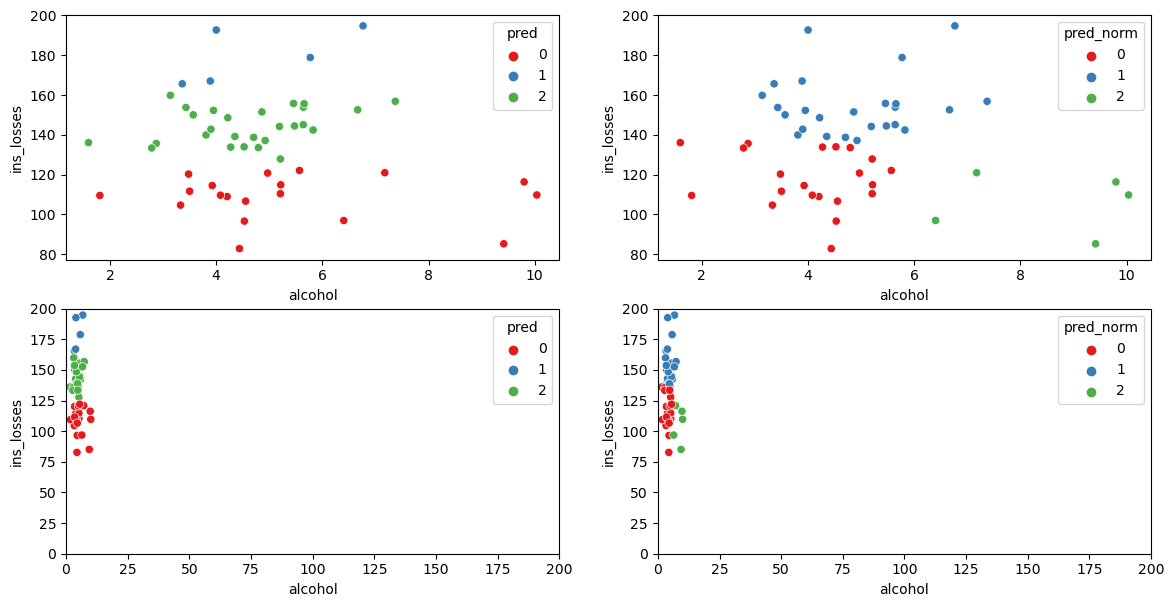

In [141]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred',
                data=df_pred, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200);

### Model Interpretation

## [ ] Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomerative Clustering

#### Fit the Model

In [142]:
from sklearn.cluster import AgglomerativeClustering

In [143]:
model_agg = AgglomerativeClustering(n_clusters=3)

In [144]:
model_agg.fit(df_norm)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [145]:
model_agg.fit_predict(X=df_norm)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Create a New Column for the Predictions

In [146]:
df_pred['pred_agg'] = model_agg.fit_predict(X=data_crash)

In [147]:
df_pred

,alcohol,ins_losses,pred,pred_norm,pred_agg
abbrev,,,,,
AL,5.640,145.08,2,1,0
AK,4.525,133.93,2,0,0
...,...,...,...,...,...
WI,4.554,106.62,0,0,1
WY,5.568,122.04,0,0,1


#### Visualize the Model

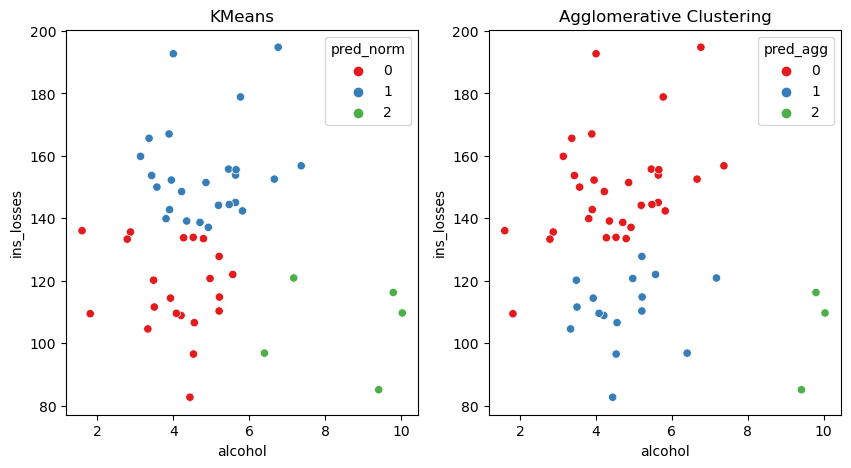

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

ax1.set_title('KMeans')
ax2.set_title('Agglomerative Clustering');

### Spectral Clustering

#### Fit the Model

In [149]:
from sklearn.cluster import SpectralClustering

In [150]:
model_spt = SpectralClustering(n_clusters=3)

In [151]:
model_spt.fit(df_norm)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [152]:
model_spt.fit_predict(X=df_norm)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

#### Create a New Column for the Predictions

In [153]:
df_pred['pred_spt'] = model_spt.fit_predict(X=df_norm)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [154]:
df_pred

,alcohol,ins_losses,pred,pred_norm,pred_agg,pred_spt
abbrev,,,,,,
AL,5.640,145.08,2,1,0,1
AK,4.525,133.93,2,0,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,0,0,1,0
WY,5.568,122.04,0,0,1,0


#### Visualize the Model

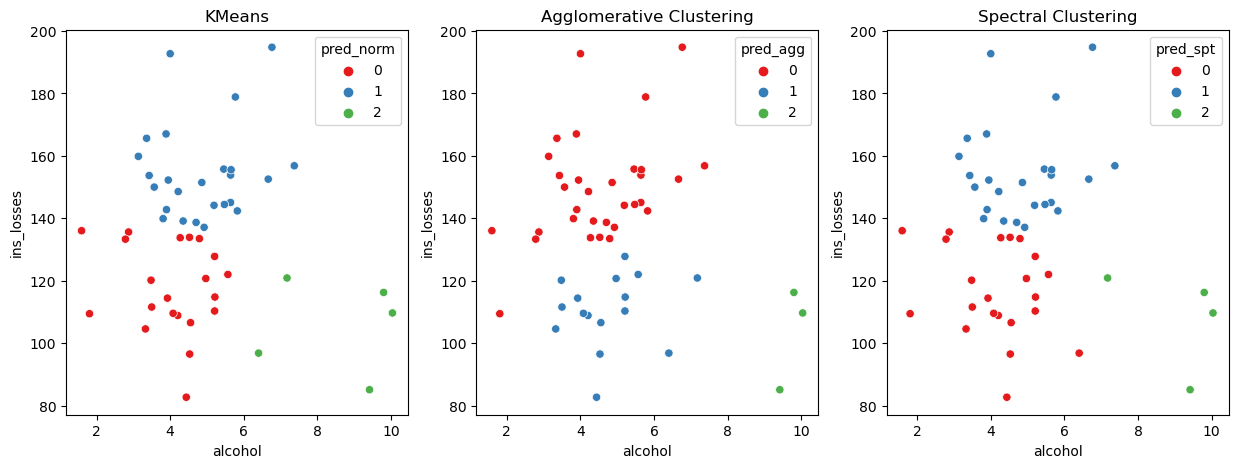

In [155]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_norm',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='pred_spt',
                data=df_pred, palette='Set1', ax=ax3);

## [ ] Practical Use Case Conclusion

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.